In [1]:
import sys
sys.path.append('/content/drive/MyDrive/QAI4EO/')

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

# Lenet-5

In [3]:
kernel_size = 3
stride = 1

lenet_5_model = Sequential()
lenet_5_model.add(Conv2D(16, kernel_size=kernel_size, strides=stride, activation='relu', padding='same', input_shape = (64,64,3)))
lenet_5_model.add(AveragePooling2D())
lenet_5_model.add(Conv2D(32, kernel_size=kernel_size, strides=stride, activation='relu', padding='valid'))
lenet_5_model.add(AveragePooling2D())
lenet_5_model.add(Conv2D(64, kernel_size=kernel_size, strides=stride, activation='relu', padding='valid'))
lenet_5_model.add(AveragePooling2D())

lenet_5_model.add(Flatten())
lenet_5_model.add(Dense(8, activation='relu'))
lenet_5_model.add(Dense(16, activation='relu'))
lenet_5_model.add(Dense(10, activation='softmax'))

lenet_5_model.compile(optimizer=SGD(lr=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Load Dataset

In [4]:
from DatasetHandler import DatasetHandler

dataset_root = '/content/drive/MyDrive/QAI4EO/datasets/EuroSAT/EuroSAT'
handler = DatasetHandler(dataset_root)

In [5]:
classes = []
for i, c in enumerate(handler.classes):
  cl = c.split('/')[-1]
  classes.append(cl)
  print('Class %d -> %s' % (i, cl))

Class 0 -> SeaLake
Class 1 -> Pasture
Class 2 -> River
Class 3 -> PermanentCrop
Class 4 -> Residential
Class 5 -> Industrial
Class 6 -> HerbaceousVegetation
Class 7 -> Highway
Class 8 -> Forest
Class 9 -> AnnualCrop


In [6]:
imgs_path, imgs_label = handler.load_paths_labels(dataset_root, classes=classes)
print('Dataset images:', len(imgs_path), 'Dataset labels:', len(imgs_label))
print('Dataset sample ->', imgs_path[0], imgs_label[0])

Dataset images: 26999 Dataset labels: 26999
Dataset sample -> /content/drive/MyDrive/QAI4EO/datasets/EuroSAT/EuroSAT/AnnualCrop/AnnualCrop_951.jpg 0


In [21]:
train_imgs, train_labels, val_images, val_labels = handler.train_validation_split(imgs_path, imgs_label, split_factor=0.2)
print('X_train shape:', train_imgs.shape, 'Y_train shape:', train_labels.shape)
print('  X_val shape: ', val_images.shape, '  Y_val shape: ', val_labels.shape)

X_train shape: (21600,) Y_train shape: (21600,)
  X_val shape:  (5399,)   Y_val shape:  (5399,)


In [27]:
val_gen = handler.cnn_data_loader(val_images, val_labels, batch_size=batch_size, img_shape=(64,64,3), n_classes=10)

In [ ]:
batch_size = 1
epochs = 100

train_gen = handler.cnn_data_loader(train_imgs, train_labels, batch_size=batch_size, img_shape=(64,64,3), n_classes=10)
val_gen = handler.cnn_data_loader(val_images, val_labels, batch_size=batch_size, img_shape=(64,64,3), n_classes=10)


es = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

history = lenet_5_model.fit(train_gen,
                            steps_per_epoch = len(train_labels)//batch_size,
                            epochs = epochs,
                            validation_data = val_gen,
                            validation_steps = len(val_labels)//batch_size,
                            callbacks = [es])

Epoch 1/100
21600/21600 [==============================] - 4088s 189ms/step - loss: 2.2570 - accuracy: 0.1568 - val_loss: 2.1602 - val_accuracy: 0.2186
Epoch 2/100
21600/21600 [==============================] - 1570s 73ms/step - loss: 2.0052 - accuracy: 0.2778 - val_loss: 1.7983 - val_accuracy: 0.3206
Epoch 3/100
21600/21600 [==============================] - 648s 30ms/step - loss: 1.7327 - accuracy: 0.3452 - val_loss: 1.6636 - val_accuracy: 0.3719
Epoch 4/100
21600/21600 [==============================] - 289s 13ms/step - loss: 1.6757 - accuracy: 0.3619 - val_loss: 1.6393 - val_accuracy: 0.3414
Epoch 5/100
21600/21600 [==============================] - 177s 8ms/step - loss: 1.5875 - accuracy: 0.4000 - val_loss: 1.5217 - val_accuracy: 0.4532
Epoch 6/100
21600/21600 [==============================] - 128s 6ms/step - loss: 1.5205 - accuracy: 0.4420 - val_loss: 1.4904 - val_accuracy: 0.4701
Epoch 7/100
21600/21600 [==============================] - 115s 5ms/step - loss: 1.4764 - accuracy:

In [ ]:
lenet_5_model.save('/content/drive/MyDrive/QAI4EO/lenet5.h5')

In [ ]:
import numpy as np
val_gen = iter(handler.cnn_data_loader(val_images, val_labels, batch_size=batch_size, img_shape=(64,64,3), n_classes=10))


predictions = []
targets = []

for ct in range(len(val_images)):
    data, target = next(val_gen)
    output = lenet_5_model.predict(data)
    
    predictions.append(np.argmax(output))
    targets.append(np.argmax(target))
  

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(predictions, targets, normalize='true')

S2
Accuracy: [0.86610169 0.67039106 0.4245283  0.72593801 0.91794872 0.60460993
 0.8721174  0.83031674 0.58199357 0.66363636] mean:  0.7157581790338153
                      precision    recall  f1-score   support

          AnnualCrop     0.8661    0.8996    0.8826       568
              Forest     0.6704    0.6831    0.6767       527
HerbaceousVegetation     0.4245    0.4601    0.4416       489
             Highway     0.7259    0.7876    0.7555       565
          Industrial     0.9179    0.8995    0.9086       597
             Pasture     0.6046    0.5741    0.5889       594
       PermanentCrop     0.8721    0.8320    0.8516       500
         Residential     0.8303    0.6158    0.7071       596
               River     0.5820    0.6351    0.6074       570
             SeaLake     0.6636    0.7411    0.7002       394

            accuracy                         0.7141      5400
           macro avg     0.7158    0.7128    0.7120      5400
        weighted avg     0.7212    0.714

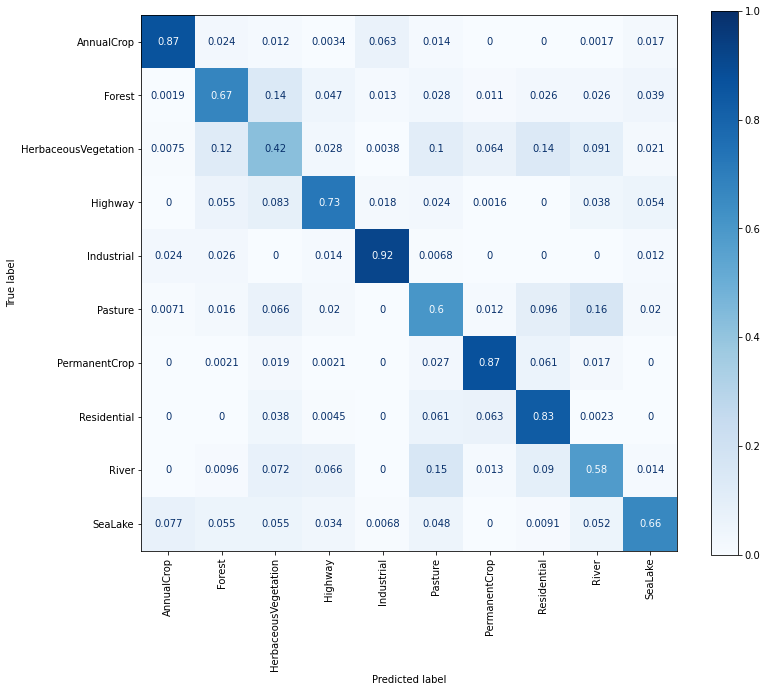

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,10))

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot(ax=axes, cmap='Blues', xticks_rotation='vertical')
print('S2')
print('Accuracy:', cm.diagonal(), 'mean: ', cm.diagonal().mean())
print(classification_report(targets, predictions, target_names=classes, digits=4))
axes.get_images()[0].set_clim(0, 1)
plt.show()
plt.close()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

In [ ]:
cm = np.array([[76.0, 13.0],[11.0, 60.0]])
cm2 = np.array([[0.85, 0.15],[0.15, 0.85]])

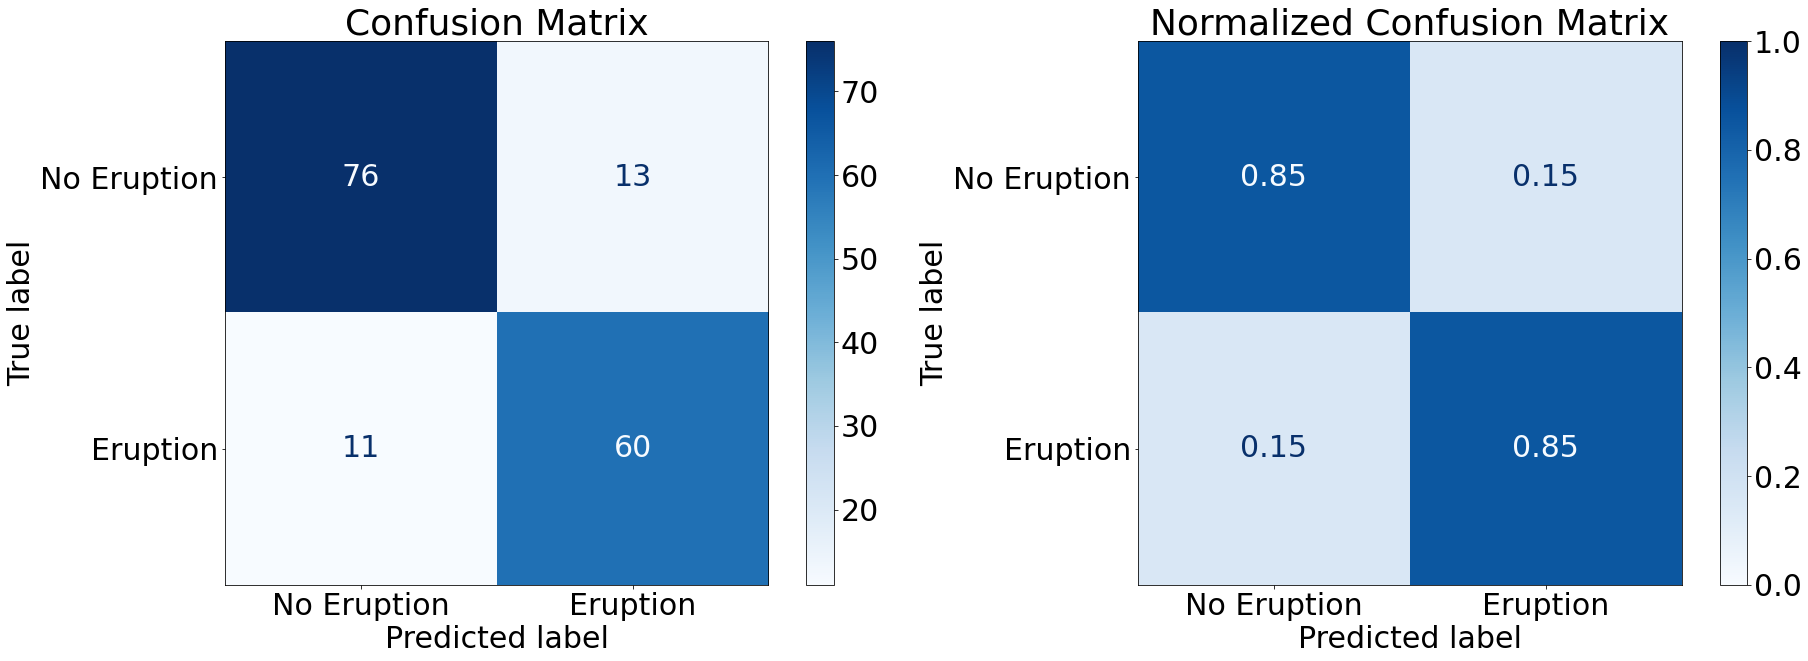

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 30})

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30,10))

cmd = ConfusionMatrixDisplay(cm, display_labels=['No Eruption', 'Eruption'])
cmd.plot(ax=axes[0], cmap='Blues', xticks_rotation='horizontal')
#axes[0].get_images()[0].set_clim(0, 1)
axes[0].set_title('Confusion Matrix')

cmd = ConfusionMatrixDisplay(cm2, display_labels=['No Eruption', 'Eruption'])
cmd.plot(ax=axes[1], cmap='Blues', xticks_rotation='horizontal')
axes[1].get_images()[0].set_clim(0, 1)
axes[1].set_title('Normalized Confusion Matrix')
plt.show()
plt.close()

In [ ]:
cm = np.array([[146, 67],[22, 51]]).astype(np.uint16)
cm2 = np.array([[0.690, 0.31],[0.30, 0.70]])

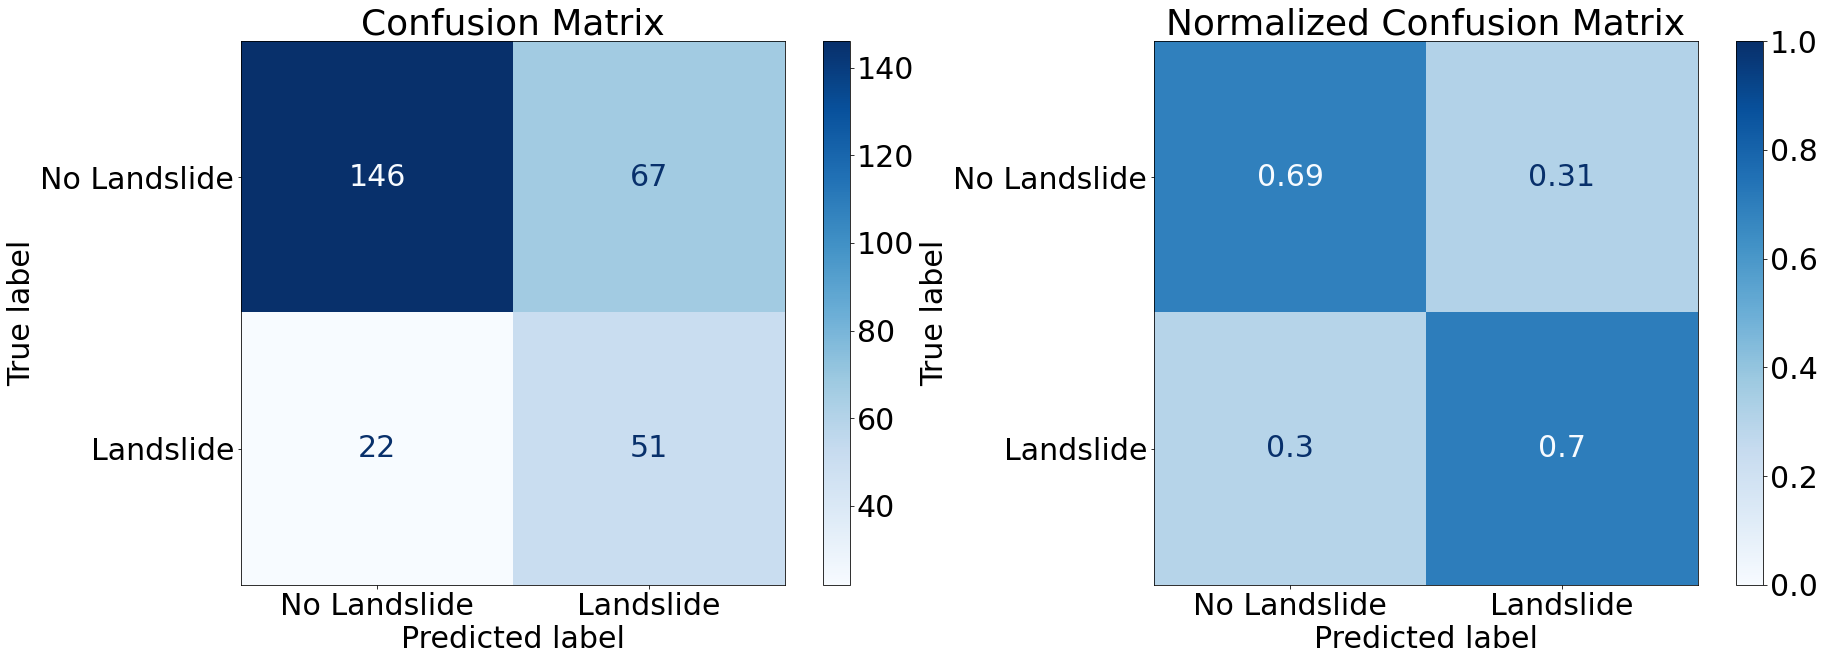

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 30})

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30,10))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Landslide', 'Landslide'])
cmd.plot(ax=axes[0], cmap='Blues', xticks_rotation='horizontal', values_format = '')
#axes[0].get_images()[0].set_clim(0, 1)
axes[0].set_title('Confusion Matrix')


cmd = ConfusionMatrixDisplay(cm2, display_labels=['No Landslide', 'Landslide'])
cmd.plot(ax=axes[1], cmap='Blues', xticks_rotation='horizontal')
axes[1].get_images()[0].set_clim(0, 1)
axes[1].set_title('Normalized Confusion Matrix')
plt.show()
plt.close()


In [ ]:
cmd.plot?